ROCHETTE
LEVEQUE

# Chargement des Données

Nous importons le dataset pour obtenir une vue d'ensemble de ses caractéristiques et de ses variables.

In [11]:
data <- read.csv("../data/support2.csv")
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11,⋯,1.1999512,141,7.459961,NA,NA,NA,7,7,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,5.5000000,132,7.250000,NA,NA,NA,NA,1,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,NA,NA,NA,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,NA,NA,NA,NA,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NA,⋯,0.7999268,143,7.509766,NA,NA,NA,NA,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,NA,NA,NA,NA,1,<2 mo. follow-up,1


# On va utiliser tout le dataset, en rajoutant des valeurs moyennes

In [12]:
data$pafi[is.na(data$pafi)] <- 333.3
data$alb[is.na(data$alb)] <- 3.5
data$bun[is.na(data$bun)] <- 6.51
data$urine[is.na(data$urine)] <- 2502

In [13]:
data[] <- lapply(data, function(x) {
  if (is.numeric(x)) {
    x[is.na(x)] <- median(x, na.rm = TRUE) 
  }
  return(x)
})
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11,⋯,1.1999512,141,7.459961,135,6.51,2502,7,7,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,5.5000000,132,7.250000,135,6.51,2502,0,1,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,135,6.51,2502,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,7.419922,135,6.51,2502,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,12,⋯,0.7999268,143,7.509766,135,6.51,2502,0,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,135,6.51,2502,0,1,<2 mo. follow-up,1


On regarde le nombre de colonnes vides

In [14]:
colonnes_chaine <- sapply(data, is.character)

nombres_vides <- sapply(data[, colonnes_chaine], function(x) sum(x == ""))

# Afficher les résultats
resultats <- data.frame(
  colonne = names(nombres_vides),
  nombre_vides = nombres_vides
)
resultats

,colonne,nombre_vides
,<chr>,<int>
sex,sex,0
dzgroup,dzgroup,0
dzclass,dzclass,0
income,income,2982
race,race,42
ca,ca,0
dnr,dnr,30
sfdm2,sfdm2,1400


On va retirer la colonne income, et les lignes ou race et dnr sont vides. On va aussi tester sans la colonne sfmd2 pour l'instant

In [15]:
data <- data[, !names(data) %in% "income"]
#data <- data[, !names(data) %in% "sfdm2"]
data <- data[!(is.na(data$sfdm2) | data$sfdm2 == ""), ]
data <- data[!(is.na(data$race) | data$race == ""), ]
data <- data[!(is.na(data$dnr) | data$dnr == ""), ]

colonnes_chaine <- sapply(data, is.character)

nombres_vides <- sapply(data[, colonnes_chaine], function(x) sum(x == ""))

# Afficher les résultats
resultats <- data.frame(
  colonne = names(nombres_vides),
  nombre_vides = nombres_vides
)
resultats

,colonne,nombre_vides
,<chr>,<int>
sex,sex,0
dzgroup,dzgroup,0
dzclass,dzclass,0
race,race,0
ca,ca,0
dnr,dnr,0
sfdm2,sfdm2,0


In [16]:
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,135,6.51,2502,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,7.419922,135,6.51,2502,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,12,⋯,0.7999268,143,7.509766,135,6.51,2502,0,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,135,6.51,2502,0,1,<2 mo. follow-up,1
7,62.37097,1,male,0,9,659,CHF,COPD/CHF/Cirrhosis,1,14,⋯,1.5998535,132,7.479492,135,6.51,2502,0,1,no(M2 and SIP pres),1
11,47.94498,1,male,0,7,114,CHF,COPD/CHF/Cirrhosis,1,12,⋯,1.0000000,134,7.419922,135,6.51,2502,2,1,no(M2 and SIP pres),1


In [17]:
modreg <- glm(hospdead ~ ., data=data, family = binomial)
summary(modreg)

Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = hospdead ~ ., family = binomial, data = data)

Coefficients: (3 not defined because of singularities)
                            Estimate Std. Error    z value Pr(>|z|)    
(Intercept)               -1.467e+15  9.064e+07  -16189332   <2e-16 ***
age                        3.738e+12  7.265e+04   51458018   <2e-16 ***
death                      5.901e+14  2.616e+06  225562162   <2e-16 ***
sexmale                   -1.724e+13  1.584e+06  -10887097   <2e-16 ***
slos                      -6.948e+12  9.121e+04  -76181818   <2e-16 ***
d.time                    -5.268e+11  2.375e+03 -221829053   <2e-16 ***
dzgroupCHF                 2.491e+14  3.019e+06   82497923   <2e-16 ***
dzgroupCirrhosis           3.013e+14  4.194e+06   71854705   <2e-16 ***
dzgroupColon Cancer        1.777e+14  6.310e+06   28155811   <2e-16 ***
dzgroupComa                2.577e+14  4.175e+06   61723598   <2e-16 ***
dzgroupCOPD                2.168e+14  3.175e+06   68296312   <2e-16 ***
dzgroupLung C

On affiche la régression

In [18]:
data$hatY  <- predict(modreg, type="response")
predicted_classes <- ifelse(data$hatY > 0.5, 1, 0)
confusion_matrix <- table(Predicted = predicted_classes, Actual = data$hospdead)
confusion_matrix

         Actual
Predicted    0    1
        0 5263  791
        1   89 1503

`geom_smooth()` using formula = 'y ~ x'


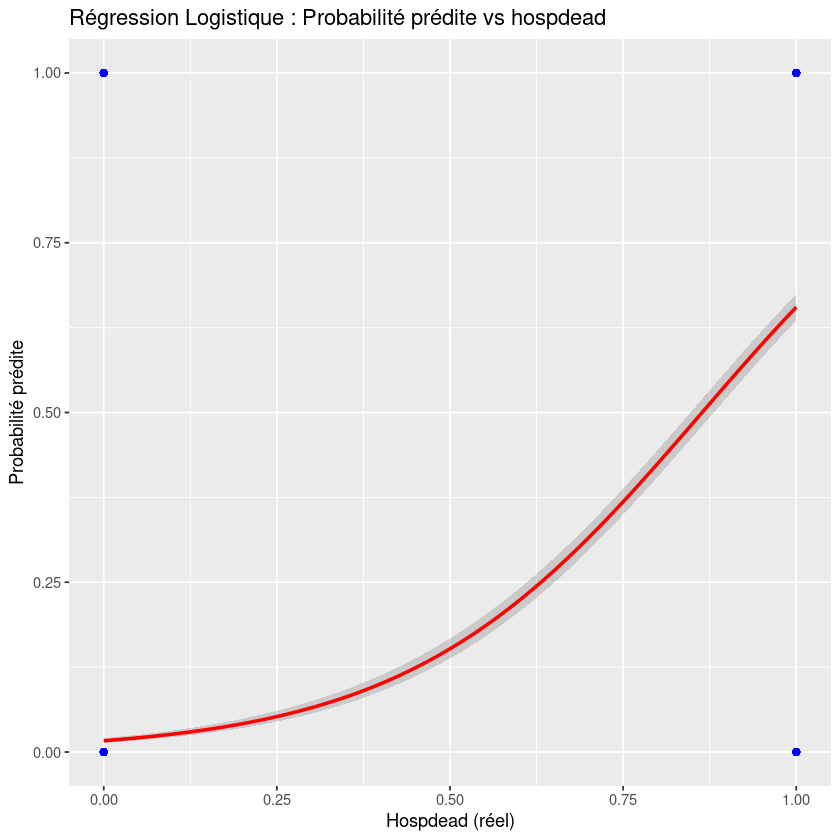

In [19]:
library(ggplot2)
ggplot(data, aes(x = hospdead, y = hatY)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")

In [20]:
false_positive_rate <- confusion_matrix[2,1] / sum(confusion_matrix[, 1])
print(false_positive_rate)

[1] 0.0166293


In [21]:
false_negative_rate <- confusion_matrix[1, 2] / sum(confusion_matrix[, 2])
print(false_negative_rate)

[1] 0.3448126


In [22]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(accuracy)

[1] 0.8849071


stepwise

In [23]:
regboth = step(lm(hospdead~., data=data), direction='both')

Start:  AIC=-21643.8
hospdead ~ age + death + sex + slos + d.time + dzgroup + dzclass + 
    num.co + edu + scoma + charges + totcst + totmcst + avtisst + 
    race + sps + aps + surv2m + surv6m + hday + diabetes + dementia + 
    ca + prg2m + prg6m + dnr + dnrday + meanbp + wblc + hrt + 
    resp + temp + pafi + alb + bili + crea + sod + ph + glucose + 
    bun + urine + adlp + adls + sfdm2 + adlsc + hatY


Step:  AIC=-21643.8
hospdead ~ age + death + sex + slos + d.time + dzgroup + num.co + 
    edu + scoma + charges + totcst + totmcst + avtisst + race + 
    sps + aps + surv2m + surv6m + hday + diabetes + dementia + 
    ca + prg2m + prg6m + dnr + dnrday + meanbp + wblc + hrt + 
    resp + temp + pafi + alb + bili + crea + sod + ph + glucose + 
    bun + urine + adlp + adls + sfdm2 + adlsc + hatY

           Df Sum of Sq    RSS    AIC
- dzgroup   7     0.245 444.10 -21654
- race      4     0.200 444.06 -21648
- ca        2     0.026 443.89 -21647
- crea      1     0.000 443.86 -2164

In [24]:
modreg2 <- glm(hospdead ~ death + slos + d.time + dzgroup + num.co + edu + scoma + charges + totcst + totmcst + avtisst + race + sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + adlp + adls + sfdm2 + adlsc, data=data, family = binomial)
summary(modreg2)

Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = hospdead ~ death + slos + d.time + dzgroup + num.co + 
    edu + scoma + charges + totcst + totmcst + avtisst + race + 
    sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + 
    adlp + adls + sfdm2 + adlsc, family = binomial, data = data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)
(Intercept)               5.853e+03  2.342e+04   0.250    0.803
death                    -5.842e+03  2.341e+04  -0.250    0.803
slos                      2.640e+01  3.773e+01   0.700    0.484
d.time                   -2.639e+01  3.760e+01  -0.702    0.483
dzgroupCHF                5.211e-02  9.852e+01   0.001    1.000
dzgroupCirrhosis         -8.870e-02  1.032e+02  -0.001    0.999
dzgroupColon Cancer       2.349e+01  5.757e+02   0.041    0.967
dzgroupComa               4.864e-01  8.469e+01   0.006    0.995
dzgroupCOPD               3.443e-03  8.842e+01   0.000    1.000
dzgroupLung Cancer        3.069e-01  1.213e+02   0.003    0.998
dzgroupMO

In [25]:
data$hatY  <- predict(modreg2, type="response")
predicted_classes <- ifelse(data$hatY > 0.5, 1, 0)
confusion_matrix <- table(Predicted = predicted_classes, Actual = data$hospdead)
confusion_matrix

         Actual
Predicted    0    1
        0 5352    0
        1    0 2294

`geom_smooth()` using formula = 'y ~ x'


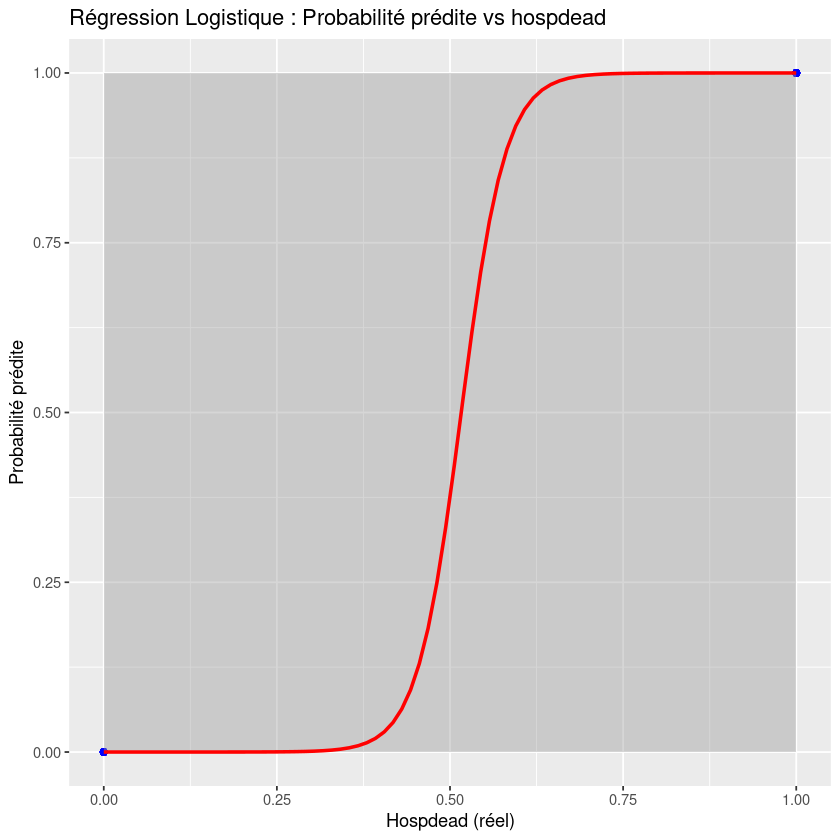

In [26]:
ggplot(data, aes(x = hospdead, y = hatY)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")

## Séparation

In [27]:
train_index <- sample(1:nrow(data), size = 0.7 * nrow(data))

train_data1 <- data[train_index, ]
test_data1 <- data[setdiff(1:nrow(data), train_index), ]

dim(train_data1)
dim(test_data1)

[1] 5352   47

[1] 2294   47

In [28]:
modreg <- glm(hospdead ~ death + slos + d.time + dzgroup + num.co + edu + scoma + charges + totcst + totmcst + avtisst + race + sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + adlp + adls + sfdm2 + adlsc, data = train_data1, family=binomial)
summary(modreg)

Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = hospdead ~ death + slos + d.time + dzgroup + num.co + 
    edu + scoma + charges + totcst + totmcst + avtisst + race + 
    sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + 
    adlp + adls + sfdm2 + adlsc, family = binomial, data = train_data1)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)
(Intercept)               7.948e+03  6.474e+04   0.123    0.902
death                    -6.872e+03  2.083e+04  -0.330    0.742
slos                      2.633e+01  4.830e+01   0.545    0.586
d.time                   -2.630e+01  4.799e+01  -0.548    0.584
dzgroupCHF                1.153e-01  1.256e+02   0.001    0.999
dzgroupCirrhosis          8.803e-01  1.732e+02   0.005    0.996
dzgroupColon Cancer       5.056e+01  7.821e+02   0.065    0.948
dzgroupComa               1.074e+00  1.295e+02   0.008    0.993
dzgroupCOPD              -1.332e-01  1.066e+02  -0.001    0.999
dzgroupLung Cancer        3.092e-01  1.678e+02   0.002    0.999
dz

In [29]:
test_data1$pred <- predict(modreg, newdata=test_data1, type="response")
predictions_class <- ifelse(test_data1$pred > 0.5, 1, 0)
confusion_matrix <- table(test_data1$hospdead, predictions_class)
print(confusion_matrix)

   predictions_class
       0    1
  0 1592   10
  1    0  692


In [30]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Précision:", accuracy))

[1] "Précision: 0.995640802092415"


`geom_smooth()` using formula = 'y ~ x'


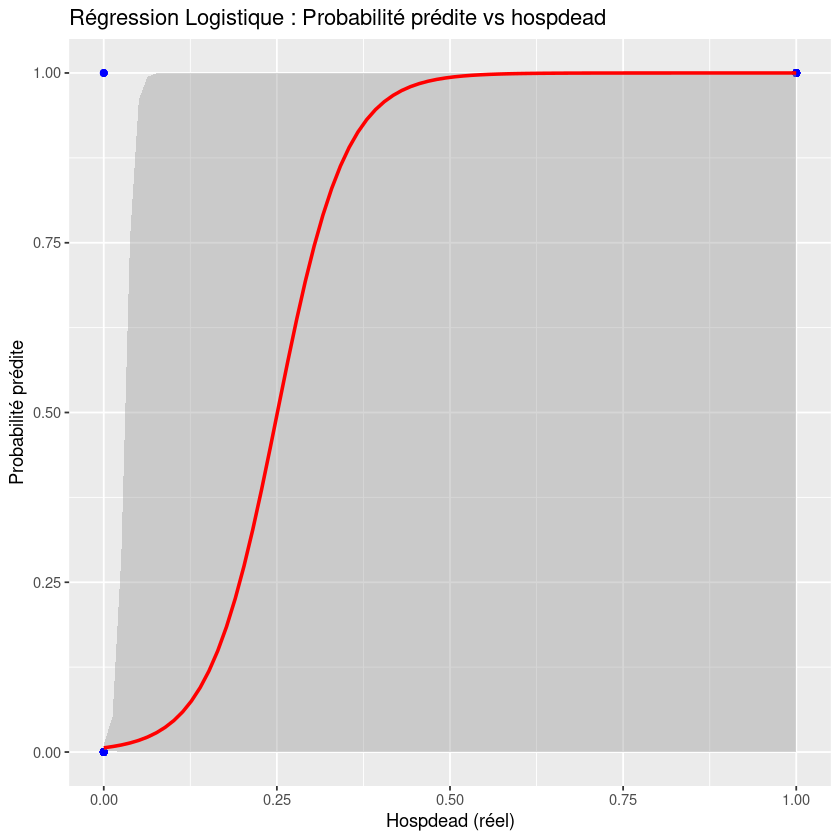

In [31]:
ggplot(test_data1, aes(x = hospdead, y = pred)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")


In [32]:
A <- ifelse(data$hospdead > 0.5, 1, 0)
A <- A[A == 1]
B <- ifelse(data$hospdead < 0.5, 1, 0)
B <- B[B == 1]

A_t = length(A)/nrow(data)
B_t = length(B)/nrow(data)

inv_At = 1/A_t *B_t
inv_Bt = 1

inv_At

[1] 2.333043

In [33]:
library(caret)

set.seed(123)
index <- createDataPartition(data$hospdead, p = 0.7, list = FALSE)

train_data2 <- data[index, ]
test_data2 <- data[-index, ]

ERROR: Error in library(caret): aucun package nommé ‘caret’ n'est trouvé


In [ ]:
weights <- ifelse(train_data2$hospdead == 1, 1, inv_At)
modreg <- glm(hospdead ~ death + slos + d.time + dzgroup + num.co + edu + scoma + charges + totcst + totmcst + avtisst + race + sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + adlp + adls + sfdm2 + adlsc, data = train_data2, family=binomial(link = "logit"), weights = weights)
summary(modreg)

In [ ]:
# Ajouter les prédictions directement au dataset de test
test_data2$pred <- predict(modreg, newdata=test_data2, type="response")

predictions_class <- ifelse(test_data2$pred > 0.5, 1, 0)
confusion_matrix <- table(test_data2$hospdead, predictions_class)
print(confusion_matrix)

In [ ]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Précision:", accuracy))

In [ ]:
# Créer le graphique avec les données de test
ggplot(test_data2, aes(x = hospdead, y = pred)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")



## Ridge et Lasso

In [ ]:
library(glmnet)
lasso_model <- glmnet(train_data2, train_data2$hospdead, alpha=1)

coef(lasso_model)